# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

In [2]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
model = GLMModel("./dna_bert_final", "simulated_sequences/augumented_sequence_size50000_length40_deletions0.1_nodeletionseq0.25.fasta", force_retrain=False)

Checking for existing trained model in ./dna_bert_final
No trained model found (metadata missing or trained=False)
Initializing fresh model
No trained model loaded. Call train() to train the model.


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

PyTorch: setting up devices


Dataset split: 40000 training, 10000 validation
Starting Training


***** Running training *****
  Num examples = 40,000
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 25,000
  Number of trainable parameters = 8,620,042


Step,Training Loss,Validation Loss
500,1.444200,1.433058
1000,1.433000,1.433996
1500,1.433800,1.426394
2000,1.428000,1.425971
2500,1.426700,1.420602
3000,1.396100,1.395141
3500,1.385600,1.384695
4000,1.373100,1.383125
4500,1.371100,1.369470
5000,1.353800,1.363039



***** Running Evaluation *****
  Num examples = 10000
  Batch size = 16
Saving model checkpoint to ./dna_bert_final/checkpoint-500
Configuration saved in ./dna_bert_final/checkpoint-500/config.json
Model weights saved in ./dna_bert_final/checkpoint-500/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./dna_bert_final/checkpoint-500/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 10000
  Batch size = 16
Saving model checkpoint to ./dna_bert_final/checkpoint-1000
Configuration saved in ./dna_bert_final/checkpoint-1000/config.json
Model weights saved in ./dna_bert_final/checkpoint-1000/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-1000/tokenizer_config.json
Special tokens file s

Saving model and tokenizer...
Training complete
Metadata saved to ./dna_bert_final/training_metadata.json
Training curves saved to ./dna_bert_final/training_curves.png


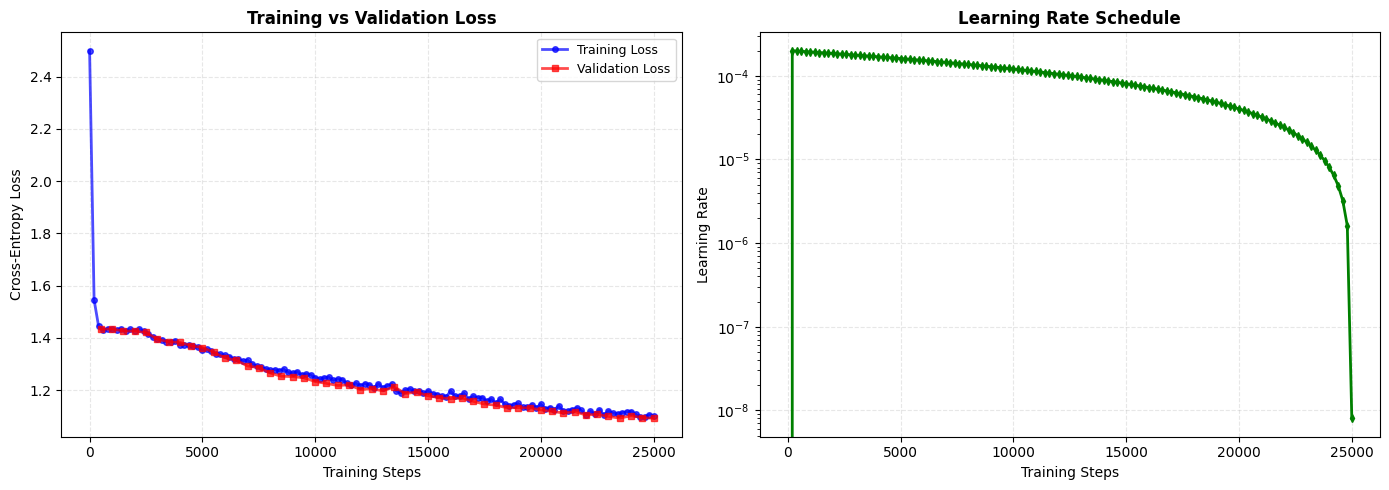


Training Summary:
Final training loss: 1.1010
Final validation loss: 1.0917
Best validation loss: 1.0917


In [5]:
model.train(epochs=10, batch_size=16, lr=2e-4)

## Visualization
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

In [ ]:
from fundemental_classes.visualization.sequence_plotter import plot


header = ">seq76129|label=both|posAmotif=93|posBmotif=111|gaplength=10|deletions=13"
sequence = "C-CCTGA-AAGGG-GGCGATC-CATTATTATGGGTACCGAAATGGAT-CTCTTTCTGTACAAT-CTTTG-TTTG-GGAAT-AGAAGGCAACAGATATTCAATCTCGCCA-CGTACTGCACCATGAAGG-TACT-GGG-CGTAACGGGAAG"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=7)